In [4]:
# Import requirement libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import random
import os

from globals import CLASSES_NAME

In [ ]:
# Define name of images and their annotation bbox
train_images_path = "dataset\\train-images.csv"
train_bbox_path = "dataset\\train-annotations-bbox.csv"

train_images_df = pd.read_csv(train_images_path)
train_bbox_df = pd.read_csv(train_bbox_path)

# Print first 5 of dataframe
print(train_images_df.head())
print(train_bbox_df.head())


In [ ]:
print(train_images_df.columns)
print(np.size(train_images_df))

In [ ]:
# Changing dataframes for comfortable usage
train_images_df = train_images_df[["ImageID"]]
train_bbox_df = train_bbox_df[["ImageID", "LabelName"]]
train_bbox_df.rename(columns={"LabelName": "LabelCode"}, inplace=True)

# Print changed dataframes
print(train_images_df.head())
print(train_bbox_df.head())

In [171]:
class_description_path = "dataset\\class-descriptions.csv"
class_description_df = pd.read_csv(class_description_path)
class_description_df.columns = ["LabelCode", "LabelName"]
class_description_list = class_description_df.loc[class_description_df["LabelName"].isin(CLASSES_NAME), "LabelCode"].tolist()
print(class_description_list)

['/m/015p6', '/m/01dws', '/m/01yrx']


In [ ]:
# === Downloading dataset ===
# Creating function for writing to file 10% of images from dataset
def write_data_part_to_file(data_split, classes_name_df, percent_of_data=None):
    """
    Function for creating list of images which will be downloaded and write that to txt file;
    :param data_split: is string value (can be set as 'train', 'test' or 'validation';
    :param percent_of_data: is the decimal value of per cent dataset which will be written to txt file;
    :return: written file with a list of images to be downloaded.
    """

    # Initializing file name for this part of split
    images_name_path = "dataset\\"+data_split+"-images.csv"
    images_bbox_path = "dataset\\"+data_split+"-annotations-bbox.csv"

    # Defining DataFrame for this files
    images_name_df = pd.read_csv(images_name_path, usecols=["ImageID"])
    images_bbox_df = pd.read_csv(images_bbox_path, usecols=["ImageID", "LabelName"])

    # Changing dataframes for comfortable usage
    images_bbox_df.rename(columns={"LabelName": "LabelCode"}, inplace=True)

    # Determining which image we need depending on whether our class is there
    images_bbox_df = images_bbox_df.loc[images_bbox_df["LabelCode"].isin(classes_name_df), "ImageID"]
    images_name_df = images_name_df.loc[images_name_df["ImageID"].isin(images_bbox_df.tolist())]
    images_name_df = images_name_df.drop_duplicates()

    # Split dataframe to percent_of_data for downloading not all images
    images_name_list = []
    if percent_of_data is not None:
        images_name_df_index = images_name_df.index.tolist()
        images_name_df_size = np.size(images_name_df_index)
        images_name_df_index = images_name_df_index[:int(images_name_df_size * percent_of_data)]
        images_name_list = images_name_df.loc[images_name_df.index.isin(images_name_df_index), "ImageID"].tolist()

    # Writing list of images names to file
    file_name = "dataset\\images_name_lists\\"+data_split+"_images_list.txt"

    with open(file_name, "w") as file:
        for image_id in images_name_list:
            file.write(f"{data_split}/{image_id}\n")
    print(f"==> {data_split}_list file created! <==")

In [ ]:
# Using function for creating images name list file for downloading images
write_data_part_to_file("train", class_description_df, percent_of_data=0.1)
write_data_part_to_file("test", class_description_df, percent_of_data=0.1)
write_data_part_to_file("validation", class_description_df, percent_of_data=1)


In [ ]:
# Download images with download script from open image dataset site
!python oid_downloader.py "dataset\\images_name_lists\\train_images_list.txt" --download_folder="dataset\\train" --num_processes=5
!python oid_downloader.py "dataset\\images_name_lists\\test_images_list.txt" --download_folder="dataset\\test" --num_processes=5
!python oid_downloader.py "dataset\\images_name_lists\\validation_images_list.txt" --download_folder="dataset\\validation" --num_processes=5


In [196]:
# Making function for viewing a random image
def view_random_image(target_dir):
    # Get a random image path
    random_image_name = random.sample(os.listdir(target_dir), 1)

    # Read the image and plot it
    image = cv2.imread(target_dir + "\\" + random_image_name[0])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Show the shape of the image
    print(f"Image shape: {image.shape}")

    plt.imshow(image)
    plt.title(random_image_name[0])
    plt.axis("off")
    plt.show()

    return image, random_image_name[0]

Image shape: (678, 1024, 3)


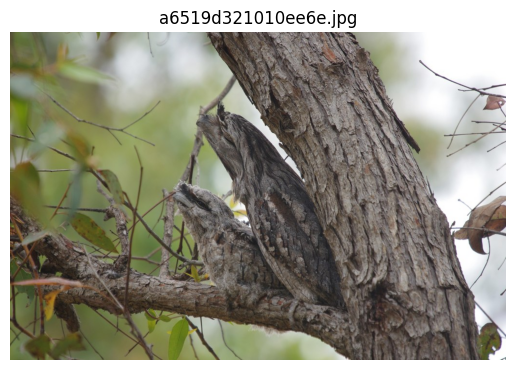

In [197]:
# Visualising image and returning it with image name
rand_image, image_name = view_random_image(target_dir="dataset\\train")

In [183]:
# Viewing image name
image_name.replace('.jpg', '')

'c4fddf2cf3a1ebf5'

In [77]:
# Viewing image array
rand_image

array([[[ 54,  78,  80],
        [ 56,  80,  82],
        [ 53,  79,  80],
        ...,
        [ 58,  79,  70],
        [ 55,  78,  68],
        [ 53,  76,  66]],

       [[ 64,  83,  87],
        [ 66,  87,  90],
        [ 65,  86,  89],
        ...,
        [ 60,  81,  72],
        [ 57,  80,  72],
        [ 55,  78,  68]],

       [[ 75,  89,  92],
        [ 78,  93,  96],
        [ 79,  94,  97],
        ...,
        [ 63,  84,  77],
        [ 59,  82,  76],
        [ 58,  81,  73]],

       ...,

       [[103, 120, 130],
        [108, 125, 135],
        [110, 127, 137],
        ...,
        [119, 137, 149],
        [116, 134, 146],
        [113, 131, 143]],

       [[106, 123, 133],
        [110, 127, 137],
        [112, 129, 139],
        ...,
        [122, 140, 152],
        [120, 138, 150],
        [115, 133, 145]],

       [[101, 118, 128],
        [106, 123, 133],
        [108, 125, 135],
        ...,
        [117, 135, 147],
        [115, 133, 145],
        [110, 128, 140]]

In [ ]:
# Getting all the pixel values between 0 & 1 (normalization)
rand_image/255.

In [13]:
# Checking the ground truth CSV file (loading it to DataFrame)
train_ground_truth = pd.read_csv("dataset\\train-annotations-bbox.csv", usecols=["ImageID", "LabelName", "XMin", "XMax", "YMin", "YMax"])
print(train_ground_truth.head())
num_bbox = train_ground_truth.shape[0]
print(f"Number of bboxes :{num_bbox}")

            ImageID  LabelName      XMin      XMax      YMin      YMax
0  000002b66c9c498e  /m/01g317  0.012500  0.195312  0.148438  0.587500
1  000002b66c9c498e  /m/01g317  0.025000  0.276563  0.714063  0.948438
2  000002b66c9c498e  /m/01g317  0.151562  0.310937  0.198437  0.590625
3  000002b66c9c498e  /m/01g317  0.256250  0.429688  0.651563  0.925000
4  000002b66c9c498e  /m/01g317  0.257812  0.346875  0.235938  0.385938
14610229


In [14]:
# Checking the ImageID with index 3
train_ground_truth.ImageID[3]

'000002b66c9c498e'

In [ ]:
# Checking the LabelName with index 3
train_ground_truth.LabelName[3]

In [ ]:
train_ground_truth.loc[3,"XMin":"YMax"]

In [198]:
# Creating function for taking XY coordinates and draw red rectangle for visualize bounding boxes for class in an image
def image_and_bboxes_view(image, bboxes_coordinates):
    """
    Visualizing image and bounding boxes in plot;
    :param image: some image for visualizing;
    :param bboxes_coordinates: Boundary coordinates of the bounding boxes in that image and for some class;
    :return: Show image and bounding boxes in one plot.
    """
    # Extract index from bboxes_coordinates dataframe
    bboxes_index = bboxes_coordinates.index.tolist()
    # Extract shape from image
    image_shape = image.shape

    for bbox_index in bboxes_index:
        # Extract coordinates of bounding box from xy_coordinates
        x_min, x_max = bboxes_coordinates.XMin[bbox_index], bboxes_coordinates.XMax[bbox_index]
        y_min, y_max = bboxes_coordinates.YMin[bbox_index], bboxes_coordinates.YMax[bbox_index]

        # Denormalize coordinates
        x_min, x_max = int(x_min * image_shape[1]), int(x_max * image_shape[1])
        y_min, y_max = int(y_min * image_shape[0]), int(y_max * image_shape[0])

        # Defining which class is inside this bounding box
        class_name = class_description_df.loc[class_description_df["LabelCode"] == bboxes_coordinates.LabelName[bbox_index], "LabelName"].tolist()[0]

        # Drawing a red rectangle to localise an object
        cv2.rectangle(image, pt1=(x_min, y_min), pt2=(x_max, y_max), color=(255, 0, 0), thickness=2)
        cv2.putText(image, class_name, (x_min, y_min-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.imshow(image)
    plt.axis("off")
    plt.show()

In [199]:
# Finding xy_coordinates in ground truth
clear_image_id = image_name.replace('.jpg', '')
image_bbox_coordinates = train_ground_truth[train_ground_truth["ImageID"] == clear_image_id]
image_bbox_coordinates = image_bbox_coordinates[image_bbox_coordinates["LabelName"].isin(class_description_list)]
print(image_bbox_coordinates)

                  ImageID LabelName      XMin      XMax      YMin      YMax
9739648  a6519d321010ee6e  /m/015p6  0.313125  0.506875  0.384325  0.855524
9739650  a6519d321010ee6e  /m/015p6  0.376250  0.680000  0.202077  0.904627


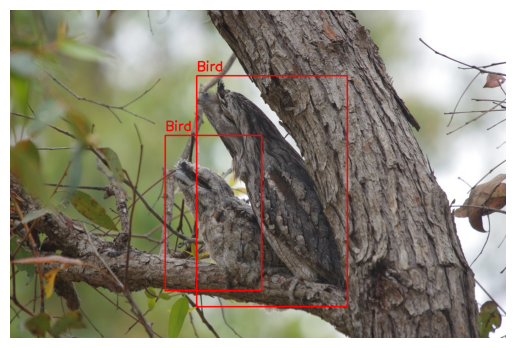

In [200]:
# Visualize image and ground truth bounding box
image_and_bboxes_view(rand_image, image_bbox_coordinates)

In [201]:
# Creating function for picking the optimal image size for training model
def visualise_images_size(target_dir):
    """
    Visualising all images shape for picking optimal image size for training;
    :param target_dir: is dir which from will be downloaded images;
    :return: plot with all images shape.
    """
    images_id = os.listdir(target_dir)
    print(images_id)

In [202]:
# Visualising images size
visualise_images_size("dataset\\train\\")

['00046a9adb6776ad.jpg', '00072e3556ad7e81.jpg', '001175fd73c3039b.jpg', '001585b6966faee0.jpg', '0019757ca6f64107.jpg', '001c3e16fa23bdc1.jpg', '0020766c6f2c6d1e.jpg', '00241c198f768841.jpg', '00299e8a13b41ab3.jpg', '002a264d37889e1d.jpg', '002c188b8fa9ebb6.jpg', '002d766cbb19c1a0.jpg', '0032df877f964819.jpg', '0033bd289dcf6d23.jpg', '0033fc2fa54e19b9.jpg', '0035ea7a3b1ecfab.jpg', '003713e607fa8f6a.jpg', '003d781673058c75.jpg', '00424836a765c888.jpg', '0047f2b497b2f75c.jpg', '0049524750a81ecc.jpg', '004b6bf1ef1414b6.jpg', '004cc8de466969bc.jpg', '004ccb5669b648ab.jpg', '004d974bc16e210e.jpg', '005176914d14be19.jpg', '00570e9f0f6e1db1.jpg', '0057cac2d33e6470.jpg', '00581b986c9dcd76.jpg', '005d805b5b987b41.jpg', '005f449bb4cfb8ff.jpg', '0066ab1ab47e1068.jpg', '0068f25f23c15388.jpg', '006ce62a72df4dd4.jpg', '006d76d444cdd57a.jpg', '007218056c621aaf.jpg', '007321d46c4b8ffe.jpg', '008178cdcc6cd205.jpg', '008280f272dea8a1.jpg', '0088e878a0c6966e.jpg', '00940ac8aa9754df.jpg', '0095a7a9dad3cf